# Incident Root Cause Analysis

## IT Operations: Root Cause Analysis
A data center team wants to build a model to predict causes of issues reported by customers. They use a system monitoring tool to track CPU, memory and application latency for all their servers. In addition, they also track specific errors reported by applications.

**Using data about the CPU load, memory load, network delays, and three types of errors, we will build a deep learning model to predict the root cause for error.**

A dataset is available that has one record for each incident, indicating if any load issues or errors were observed during that time. The root cause for each  incident is one out of - Memory Leak, Network Delay, or Database Issue.

## Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## Prepare Input Data for Deep Learning


In [ ]:
# Load the dataset into a pandas dataframe and review content
symptom_data = pd.read_csv('/content/drive/MyDrive/Deep Learning/root_cause_analysis.csv')
symptom_data.head()

,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY_LEAK
1,2,0,0,0,0,0,0,1,MEMORY_LEAK
2,3,0,1,1,0,0,1,1,MEMORY_LEAK
3,4,0,1,0,1,1,0,1,MEMORY_LEAK
4,5,1,1,0,1,0,1,0,NETWORK_DELAY


In [ ]:
symptom_data.dtypes

,0
ID,int64
CPU_LOAD,int64
MEMORY_LEAK_LOAD,int64
DELAY,int64
ERROR_1000,int64
ERROR_1001,int64
ERROR_1002,int64
ERROR_1003,int64
ROOT_CAUSE,object


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras

label_encoder = LabelEncoder()
symptom_data['ROOT_CAUSE'] = label_encoder.fit_transform(symptom_data['ROOT_CAUSE'])

In [ ]:
# Convert pandas dataframe into numpy array
np_symptom = symptom_data.to_numpy().astype(float)

In [ ]:
# Extract the feature and target variables
X_data = np_symptom[:,1:8]
y_data = np_symptom[:,8]
y_data = keras.utils.to_categorical(y_data,3)

In [ ]:
# Split training and test data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.10)

print('Shape of feature variables: ', X_train.shape)
print('Shape of target variables: ', y_train.shape)

Shape of feature variables:  (900, 7)
Shape of target variables:  (900, 3)


## Building the model

In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2

# Setup hyperparameters for building the model
NB_CLASSES = len(label_encoder.classes_)
N_HIDDEN = 128

# Create a keras Sequential model
model = keras.Sequential()

In [ ]:
# Add the hidden layers and output layer to the model
model.add(keras.layers.Dense(N_HIDDEN,
                             input_shape=(7,),
                             name='Hidden-Layer-1',
                             activation='relu'))

model.add(keras.layers.Dense(N_HIDDEN,
                             name='Hidden-Layer-2',
                             activation='relu'))

model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)               │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden-Layer-2 (Dense)               │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output-Layer (Dense)                 │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,923 (70.01 KB)

 Trainable params: 17,923 (70.01 KB)

 Non-trainable params: 0 (0.00 B)

## Training and Evaluating the model

In [ ]:
# Make it verbose so we can see the progress of the training
VERBOSE = 1

In [ ]:
# Setup hyperparameters for training the model

# Set batch size
BATCH_SIZE = 64
# Set number of epochs
EPOCHS = 20
# Set validation split. 20% of the training data will be used for validation after each epoch
VALIDATION_SPLIT = 0.2

Training progress:
Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5557 - loss: 1.0162 - val_accuracy: 0.8167 - val_loss: 0.7515
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8235 - loss: 0.7261 - val_accuracy: 0.8278 - val_loss: 0.5797
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8029 - loss: 0.5910 - val_accuracy: 0.8278 - val_loss: 0.4897
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8367 - loss: 0.5091 - val_accuracy: 0.8333 - val_loss: 0.4656
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8392 - loss: 0.4564 - val_accuracy: 0.8278 - val_loss: 0.4620
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8361 - loss: 0.4537 - val_accuracy: 0.8389 - val_loss: 0.4324
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8306 - loss: 0.4596 - val_accuracy: 0.8167 - val_loss: 0.4379
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8232 - loss: 0.4657 - val_accuracy

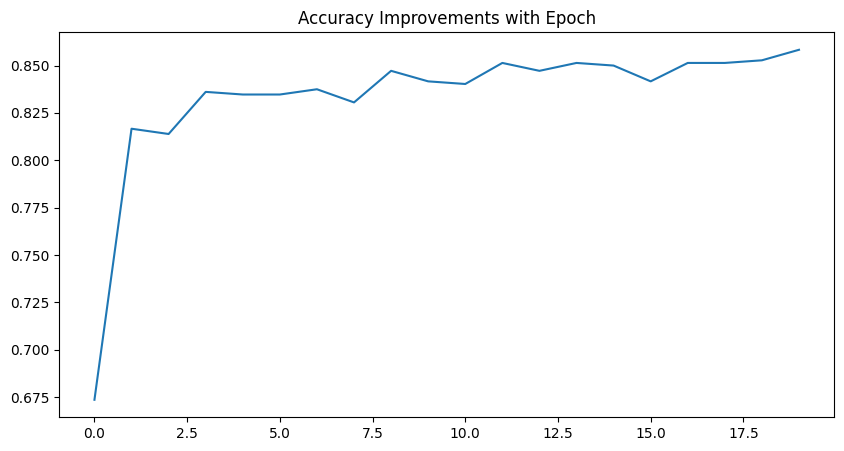

In [ ]:
print('Training progress:')

# Fit the model. This will perform the entire training cycle, including forward propagation, loss computation, back propagation, and gradient descent.
# Execute for the specified batch sizes and epoch
# Perform validation after each epoch

history = model.fit(X_train,
                    y_train,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = VERBOSE,
                    validation_split = VALIDATION_SPLIT)

print('Accuracy during training:')
import matplotlib.pyplot as plt

# Plot accuracy of model after each epoch
pd.DataFrame(history.history)["accuracy"].plot(figsize=(10, 5))
plt.title("Accuracy Improvements with Epoch")
plt.show()

In [ ]:
# Evaluate the model with the test dataset and print results
print('Evaluation results:')
model.evaluate(X_test, y_test)

Evaluation results:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8464 - loss: 0.4367 


[0.43335476517677307, 0.8399999737739563]

## Predicting Root Causes

In [ ]:
#Pass individual flags to Predict the root cause
import numpy as np

CPU_LOAD=1
MEMORY_LOAD=0
DELAY=0
ERROR_1000=0
ERROR_1001=1
ERROR_1002=1
ERROR_1003=0

input_data = [[CPU_LOAD,MEMORY_LOAD,DELAY,
      ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003]]

prediction=np.argmax(model.predict(
    np.array(input_data)), axis=1 )

print(label_encoder.inverse_transform(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
['DATABASE_ISSUE']


In [ ]:
#Predicting as a Batch
print(label_encoder.inverse_transform(np.argmax(
        model.predict(np.array([[1,0,0,0,1,1,0],
                                [0,1,1,1,0,0,0],
                                [1,1,0,1,1,0,1],
                                [0,0,0,0,0,1,0],
                                [1,0,1,0,1,1,1]])), axis=1 )))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
['DATABASE_ISSUE' 'NETWORK_DELAY' 'MEMORY_LEAK' 'DATABASE_ISSUE'
 'DATABASE_ISSUE']
